# analisi e predizione esopianeti sfruttando i dataset pubblici NASA

## caricamento dataset e librerie
caricamento dataset in un dataframe pandas. Vengono visualizzate le informazioni sul dataset e le prime righe in modo da avere una visione generale

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS
data_path = "data/PS_2025.01.02_03.08.46.csv"
df = pd.read_csv(data_path, comment='#')

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38047 entries, 0 to 38046
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          38047 non-null  object 
 1   hostname         38047 non-null  object 
 2   default_flag     38047 non-null  int64  
 3   sy_snum          38047 non-null  int64  
 4   sy_pnum          38047 non-null  int64  
 5   discoverymethod  38047 non-null  object 
 6   disc_year        38047 non-null  int64  
 7   disc_facility    38047 non-null  object 
 8   soltype          38047 non-null  object 
 9   pl_controv_flag  38047 non-null  int64  
 10  pl_refname       38047 non-null  object 
 11  pl_orbper        34837 non-null  float64
 12  pl_orbpererr1    33296 non-null  float64
 13  pl_orbpererr2    33295 non-null  float64
 14  pl_orbperlim     34837 non-null  float64
 15  pl_orbsmax       21499 non-null  float64
 16  pl_orbsmaxerr1   7041 non-null   float64
 17  pl_orbsmaxer

None

In [ ]:
display(df.head(3))

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
0,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2023-09-19,2023-08,2023-09-19


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38047 entries, 0 to 38046
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          38047 non-null  object 
 1   hostname         38047 non-null  object 
 2   default_flag     38047 non-null  int64  
 3   sy_snum          38047 non-null  int64  
 4   sy_pnum          38047 non-null  int64  
 5   discoverymethod  38047 non-null  object 
 6   disc_year        38047 non-null  int64  
 7   disc_facility    38047 non-null  object 
 8   soltype          38047 non-null  object 
 9   pl_controv_flag  38047 non-null  int64  
 10  pl_refname       38047 non-null  object 
 11  pl_orbper        34837 non-null  float64
 12  pl_orbpererr1    33296 non-null  float64
 13  pl_orbpererr2    33295 non-null  float64
 14  pl_orbperlim     34837 non-null  float64
 15  pl_orbsmax       21499 non-null  float64
 16  pl_orbsmaxerr1   7041 non-null   float64
 17  pl_orbsmaxer

## analisi statistica
refactoring del dataset. pulizia valori mancanti / duplicati / nulli

In [ ]:
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

print(missing_values[missing_values > 0])
print(f"duplicati: {duplicates}")
print(f"dimensioni: {df.shape[0]} righe, {df.shape[1]} colonne.")


pl_orbper          3210
pl_orbpererr1      4751
pl_orbpererr2      4752
pl_orbperlim       3210
pl_orbsmax        16548
                  ...  
sy_gaiamagerr1     1058
sy_gaiamagerr2     1058
rowupdate            34
pl_pubdate           33
releasedate          33
Length: 81, dtype: int64
duplicates: 54
dimensions: 38047 rows, 92 columns.


## matrice di Correlazione
esecuzione dell’analisi statistica sulle colonne numeriche. ciò consente di comprendere le distribuzioni, i valori medi e i range delle variabili numeriche.

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number])
display(numeric_columns.describe())

,default_flag,sy_snum,sy_pnum,disc_year,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
count,38047.000000,38047.000000,38047.000000,38047.000000,38047.000000,3.483700e+04,3.329600e+04,3.329500e+04,34837.000000,21499.000000,...,36328.000000,37291.000000,37278.000000,37277.000000,37279.000000,37039.000000,37039.000000,36989.000000,36989.000000,36989.000000
mean,0.152732,1.084553,1.898967,2015.431755,0.001998,1.253518e+04,1.447668e+04,-3.409841e+03,-0.000230,4.682512,...,-36.635856,13.598434,0.116719,-0.117321,11.584662,0.035746,-0.035251,13.366760,0.000519,-0.000519
std,0.359734,0.308077,1.211980,3.880335,0.044650,2.155052e+06,2.575925e+06,5.493010e+05,0.020046,182.735325,...,173.424543,2.400502,0.150200,0.180170,2.305581,0.201583,0.193472,2.338012,0.001087,0.001087
min,0.000000,1.000000,1.000000,1992.000000,0.000000,9.070629e-02,0.000000e+00,-1.000000e+08,-1.000000,0.004400,...,-2900.000000,0.872000,0.001000,-12.270000,-3.044000,0.011000,-11.140000,2.364310,0.000118,-0.063232
25%,0.000000,1.000000,1.000000,2014.000000,0.000000,4.411953e+00,8.100000e-06,-1.991950e-04,0.000000,0.054600,...,-21.160000,12.603000,0.046200,-0.137000,10.764000,0.020000,-0.034000,12.418400,0.000253,-0.000506
50%,0.000000,1.000000,1.000000,2016.000000,0.000000,1.035588e+01,3.809500e-05,-3.817000e-05,0.000000,0.100600,...,-7.783000,14.178000,0.092000,-0.092000,12.270000,0.024000,-0.024000,14.000400,0.000352,-0.000352
75%,0.000000,1.000000,2.000000,2016.000000,0.000000,2.667571e+01,1.997000e-04,-8.100000e-06,0.000000,0.215800,...,-2.270750,15.268000,0.137000,-0.046200,13.169000,0.034000,-0.020000,15.042100,0.000506,-0.000253
max,1.000000,4.000000,8.000000,2025.000000,1.000000,4.020000e+08,4.700000e+08,0.000000e+00,1.000000,19000.000000,...,2700.000000,45.340000,11.000000,-0.001000,35.330000,9.995000,-0.011000,20.186100,0.063232,-0.000118


calcolo matrice di correlazione per individuare relazioni lineari tra le variabili numeriche. i risultati sono rappresentati graficamente tramite una heatmap.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

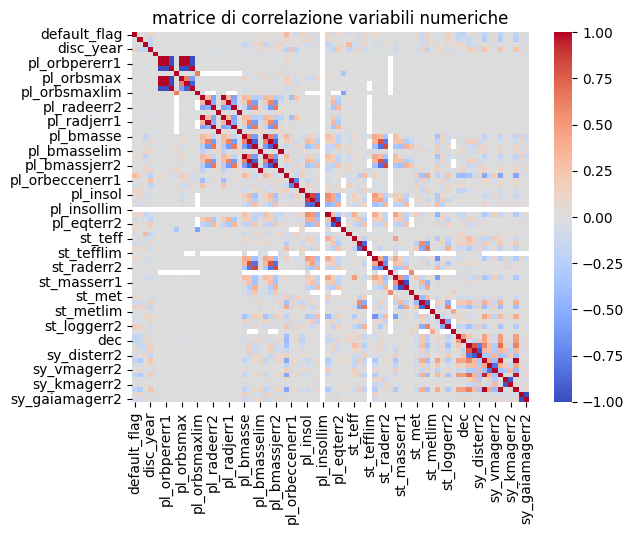

<Figure size 1300x600 with 0 Axes>

In [ ]:
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("matrice di correlazione variabili numeriche")
plt.show()

## analisi valori mancanti
esplorazione e visualizzazione dei valori mancanti nel dataset. i risultati sono presentati tramite un grafico a barre per evidenziare le colonne con il numero maggiore di valori nulli.

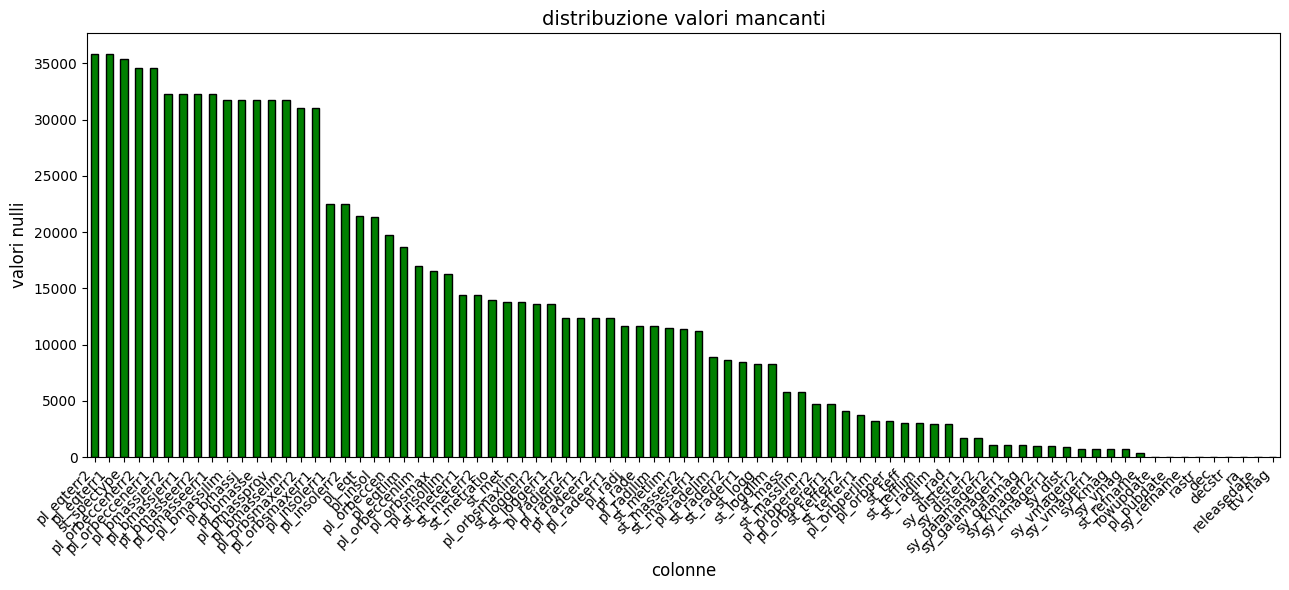

In [ ]:
missing_values = df.isnull().sum()
missing_df = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(13, 6))
missing_df.plot(kind='bar', color='green', edgecolor='black')
plt.title("distribuzione valori mancanti", fontsize=14)
plt.ylabel("valori nulli", fontsize=12)
plt.xlabel("colonne", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## variabile delle scoperte annuali
calcolo delle scoperte annuali totali per gli esopianeti e visualizzazione tramite un grafico a barre.

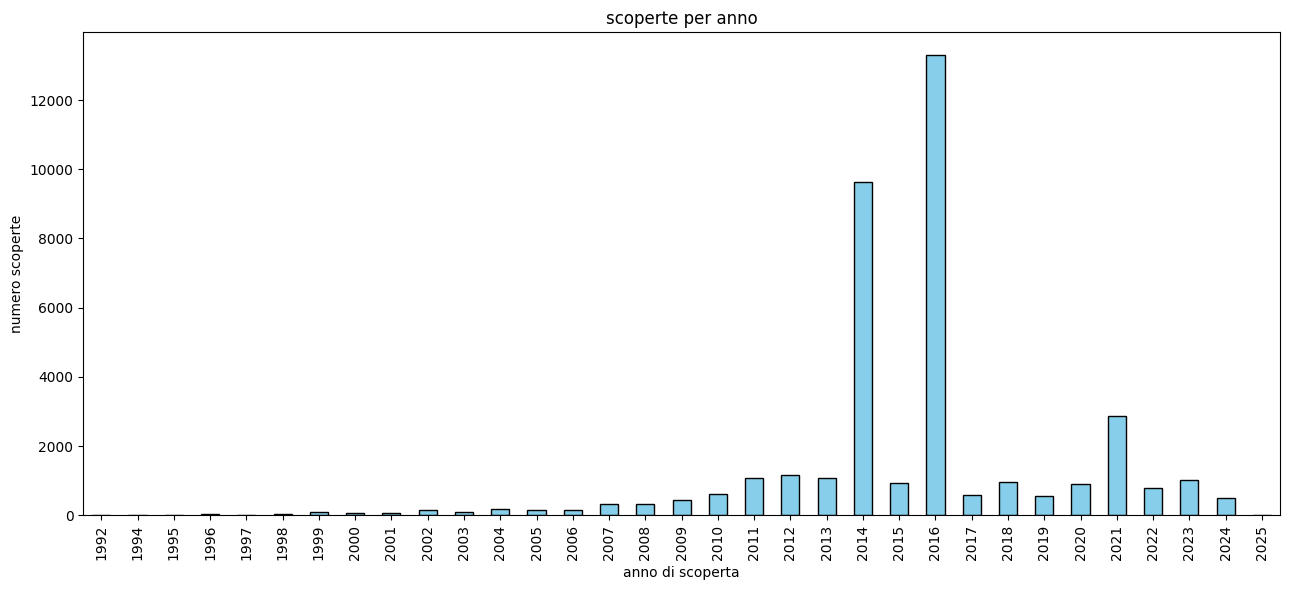

In [ ]:
scoperte_annuali = df.groupby('disc_year')['pl_name'].count()

plt.figure(figsize=(13, 6))
scoperte_annuali.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("scoperte per anno")
plt.xlabel("anno di scoperta")
plt.ylabel("numero scoperte")
plt.tight_layout()
plt.show()

## correlazione tra metodo di scoperta e numero di pianeti
esplorazione delle correlazioni tra i metodi di scoperta e il numero di pianeti rilevati tramite un grafico a barre. è stata scelta una scala logaritmica per migliore visualizzazione.

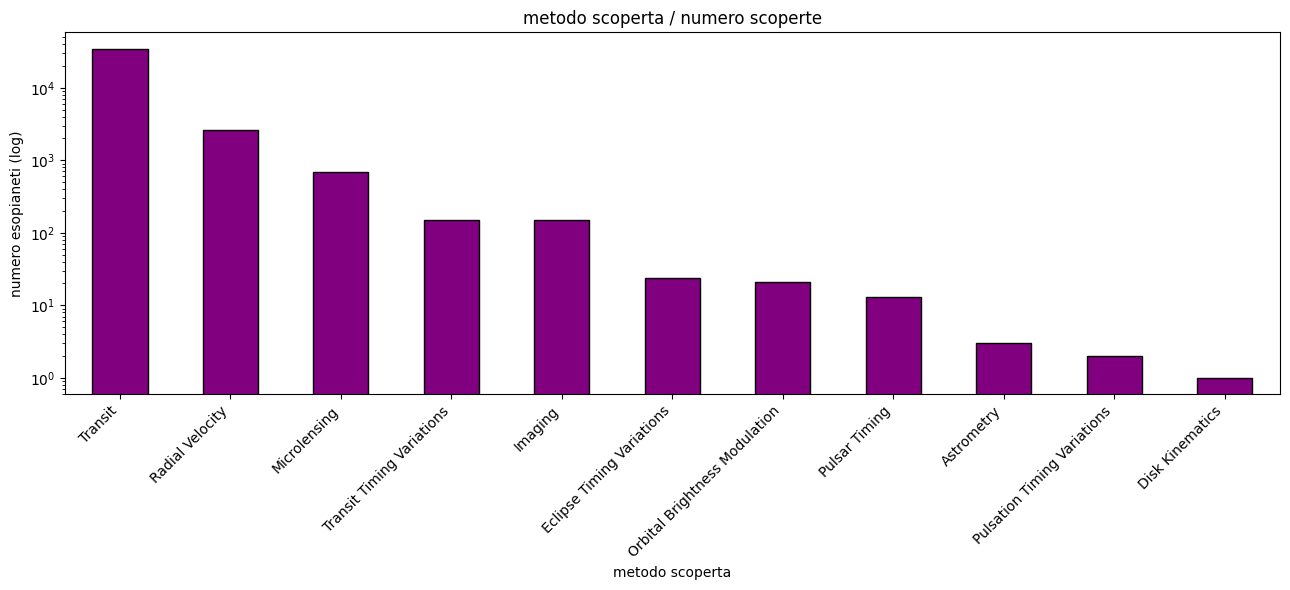

In [ ]:
discovery_method = df['discoverymethod'].value_counts()

plt.figure(figsize=(13, 6))
discovery_method.plot(kind='bar', color='purple', edgecolor='black')
plt.title("metodo scoperta / numero scoperte")
plt.xlabel("metodo scoperta")
plt.ylabel("numero esopianeti (log)")
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## analisi dei pianeti per tipo di sistema
calcolo della distribuzione dei pianeti per numero di stelle nel sistema e creazione di un diagramma a torta per evidenziarne le proporzioni.

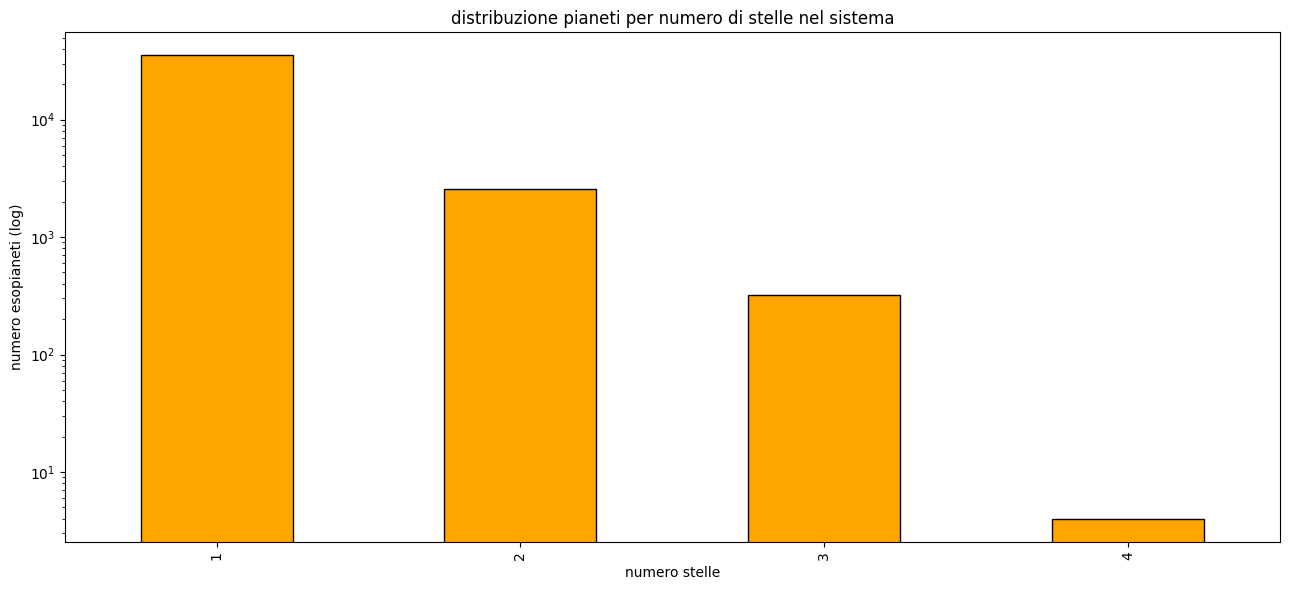

In [ ]:
pianeti_per_sistema = df['sy_snum'].value_counts()

plt.figure(figsize=(13, 6))
pianeti_per_sistema.plot(kind='bar', color='orange', edgecolor='black')
plt.title("distribuzione pianeti per numero di stelle nel sistema")
plt.xlabel("numero stelle")
plt.ylabel("numero esopianeti (log)")
plt.yscale('log')
plt.tight_layout()
plt.show()

## regressione lineare con scikit-learn
in questa sezione, utilizziamo un modello di regressione lineare per prevedere una variabile del dataset degli esopianeti. La variabile indipendente `(X)` e la variabile dipendente `(y)` saranno scelte tra le colonne disponibili nel dataset.

### preparazione delle variabili
scegliamo pl_rade `(raggio del pianeta)` come variabile indipendente e pl_bmasse `(massa del pianeta)` come variabile dipendente, eliminando eventuali valori nulli.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_filtered = df[['pl_rade', 'pl_bmasse']].dropna()
X = data_filtered['pl_rade'].values.reshape(-1, 1)
y = data_filtered['pl_bmasse'].values

### creazione modello regressione lineare
dividiamo i dati in training e test set, alleniamo il modello e calcoliamo gli errori.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"errore quadratico medio (MSE): {mse}")
print(f"coefficiente angolare: {model.coef_[0]}")
print(f"intercetta: {model.intercept_}")

errore quadratico medio (MSE): 1562460.3121118022
coefficiente angolare: 50.51074948919495
intercetta: -55.58519327844783


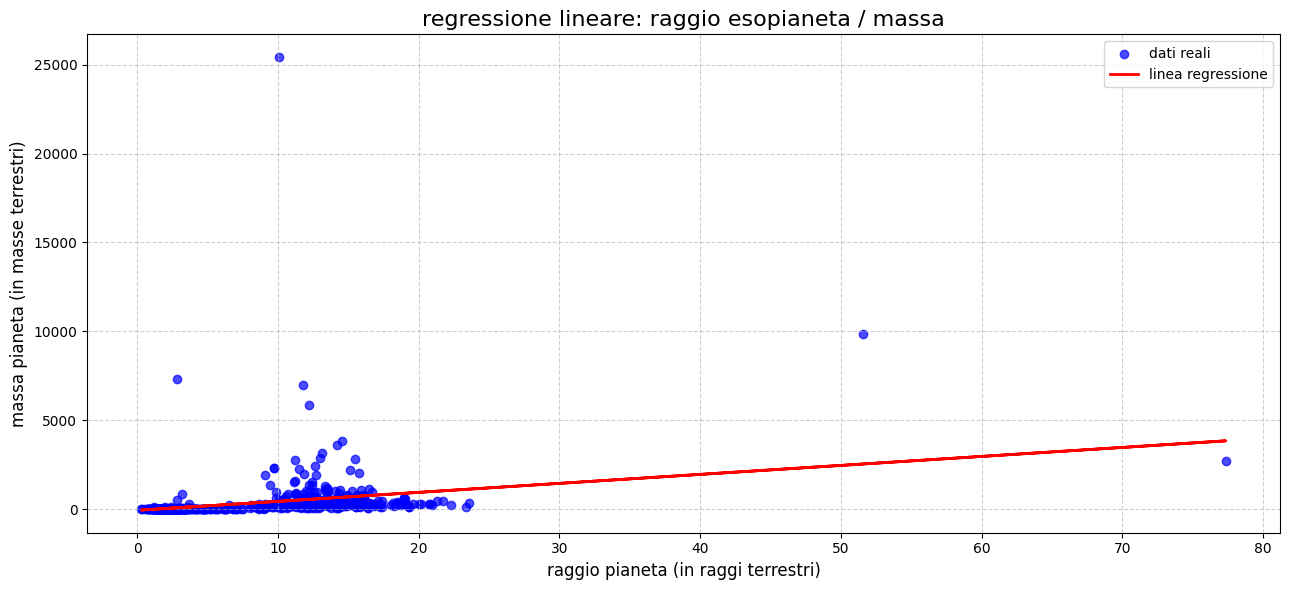

In [ ]:
plt.figure(figsize=(13, 6))

plt.scatter(X_test, y_test, color='blue', label='dati reali', alpha=0.7)
plt.plot(X_test, y_pred, color='red', label='linea regressione', linewidth=2)
plt.title('regressione lineare: raggio esopianeta / massa', fontsize=16)
plt.xlabel('raggio pianeta (in raggi terrestri)', fontsize=12)
plt.ylabel('massa pianeta (in masse terrestri)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()